In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Fri, 23 Sep 2022 11:26


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"29,222,316","31,639,601","2,417,285",8.27%
Arterial,"26,492,048","25,618,620","-873,428",-3.30%
Collector,"4,421,943","3,996,453","-425,490",-9.62%
Ramp,"773,751","627,291","-146,460",-18.93%
Total,"60,910,910","61,881,965","971,055",1.59%


#### Daily | By Facility Type - Pierce County

In [6]:
df1 = df[df['county'] == 'Pierce']

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"6,716,918","7,670,763","953,845",14.20%
Arterial,"7,920,717","7,774,043","-146,674",-1.85%
Collector,"885,395","780,153","-105,242",-11.89%
Ramp,"245,732","196,924","-48,808",-19.86%
Total,"15,769,614","16,421,883","652,269",4.14%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['county'] != 'Pierce']

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"22,505,398","23,968,838","1,463,440",6.50%
Arterial,"18,571,331","17,844,577","-726,754",-3.91%
Collector,"3,536,548","3,216,300","-320,248",-9.06%
Ramp,"528,019","430,367","-97,652",-18.49%
Total,"45,141,296","45,460,082","318,786",0.71%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,199,530","32,860,377","1,660,847",5.32%
Kitsap,"4,557,863","3,819,228","-738,635",-16.21%
Pierce,"15,769,614","16,421,883","652,269",4.14%
Snohomish,"9,383,903","8,780,477","-603,426",-6.43%
Total,"60,910,910","61,881,965","971,055",1.59%


----
### Daily | Scatterplots 

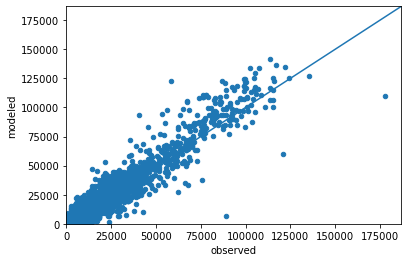

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9522130146828975


---
By County

King r^2: 0.9666390247419357
Kitsap r^2: 0.9559600433028158
Pierce r^2: 0.9337718832467754


Snohomish r^2: 0.930838292516059


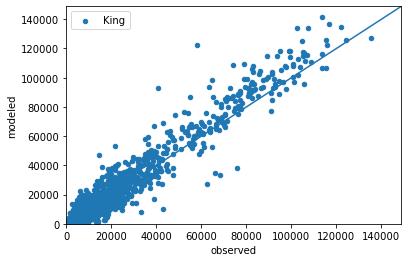

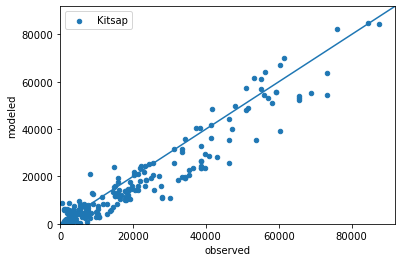

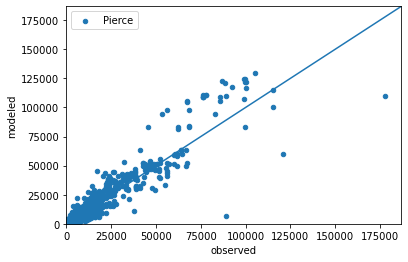

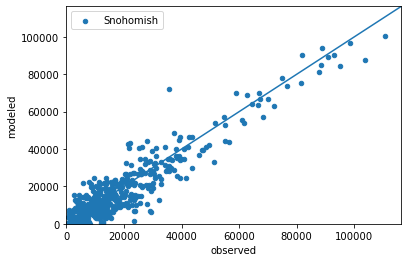

In [13]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9059132124797707
r^2 Arterial: 0.8280382993352372


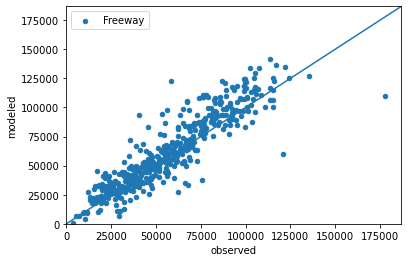

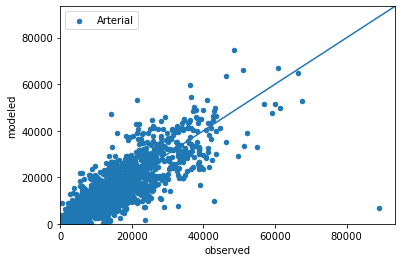

In [14]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Pierce County

r^2 Freeway: 0.8314351595203271
r^2 Arterial: 0.8298050017446283


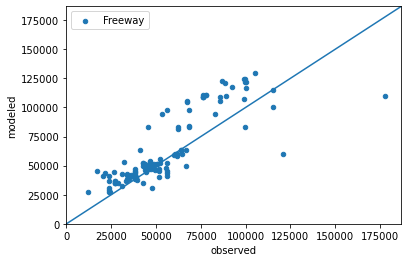

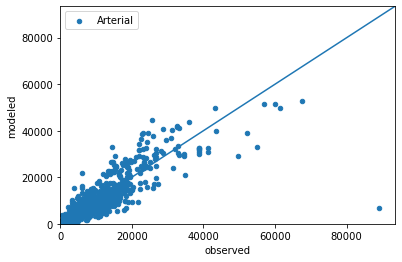

In [15]:
df1 = df[df['county'] == 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9293616621827552
r^2 Arterial: 0.8216711864910463


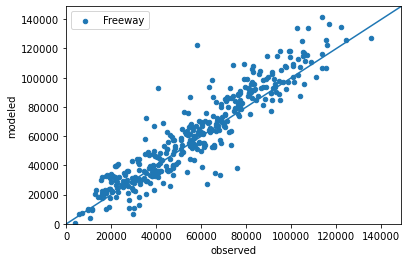

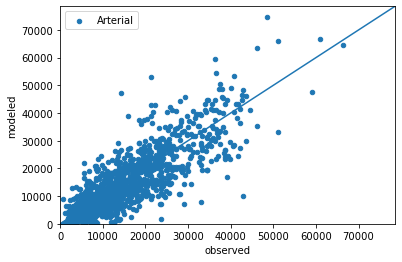

In [16]:
df2 = df[(df['county'] != 'Pierce') & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.917938191174315


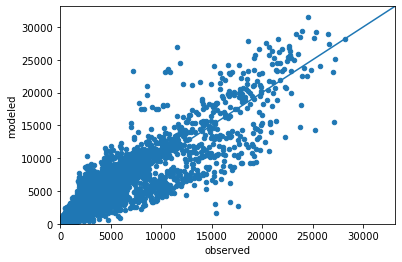

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Pierce County**

r^2: 0.9149946347746781


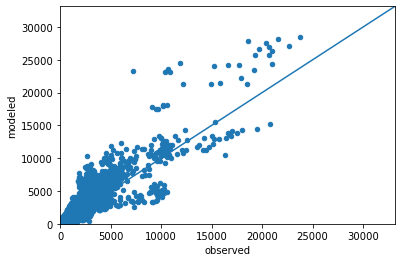

In [18]:
df1 = df[df['county'] == 'Pierce']
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other Counties**

r^2: 0.8893599722969677


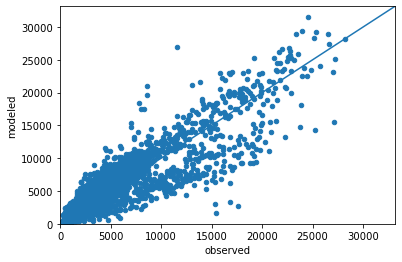

In [19]:
df2 = df[df['county'] != 'Pierce']
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,NS-02,"576,175","615,062",Pierce,"38,887",6.75%
1,KENT,"550,322","604,014",King,"53,692",9.76%
2,SEATTLE - SOUTH OF CBD,"526,500","569,112",King,"42,612",8.09%
3,SHIP CANAL,"519,802","589,039",King,"69,237",13.32%
4,EW-05,"433,188","391,004",Pierce,"-42,184",-9.74%
5,KIRKLAND-REDMOND,"414,120","403,871",King,"-10,249",-2.47%
6,EW-04,"411,734","324,808",Pierce,"-86,926",-21.11%
7,MILL CREEK,"400,848","396,829",King,"-4,019",-1.00%
8,SOUTH BELLEVUE,"399,500","356,890",King,"-42,610",-10.67%
9,SEATTLE - NORTH,"372,000","388,004",King,"16,004",4.30%


r^2 : 0.9831080168361376


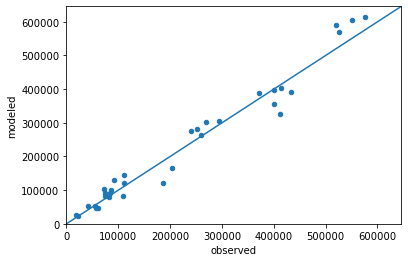

In [21]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Pierce County

In [22]:
df1 = df[df['county'] == 'Pierce']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,NS-02,"576,175","615,062",Pierce,"38,887",6.75%
1,EW-05,"433,188","391,004",Pierce,"-42,184",-9.74%
2,EW-04,"411,734","324,808",Pierce,"-86,926",-21.11%
3,EW-03,"241,168","275,801",Pierce,"34,633",14.36%
4,EW-06,"203,225","165,498",Pierce,"-37,727",-18.56%
5,EW-08,"185,774","120,024",Pierce,"-65,750",-35.39%
6,NS-05,"110,096","120,033",Pierce,"9,937",9.03%
7,EW-02,"86,000","101,692",Pierce,"15,692",18.25%
8,EW-01,"84,698","92,643",Pierce,"7,945",9.38%
9,NS-03,"82,064","79,705",Pierce,"-2,359",-2.87%


r^2 : 0.9768048586716385


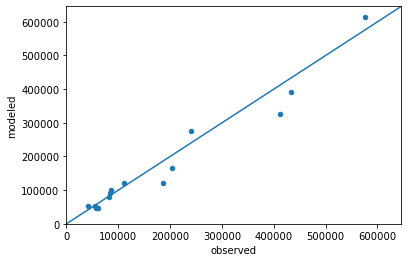

In [23]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other Counties

In [24]:
df2 = df[df['county'] != 'Pierce']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,observed,modeled,county,diff,percent_diff
0,KENT,"550,322","604,014",King,"53,692",9.76%
1,SEATTLE - SOUTH OF CBD,"526,500","569,112",King,"42,612",8.09%
2,SHIP CANAL,"519,802","589,039",King,"69,237",13.32%
3,KIRKLAND-REDMOND,"414,120","403,871",King,"-10,249",-2.47%
4,MILL CREEK,"400,848","396,829",King,"-4,019",-1.00%
5,SOUTH BELLEVUE,"399,500","356,890",King,"-42,610",-10.67%
6,SEATTLE - NORTH,"372,000","388,004",King,"16,004",4.30%
7,BOTHELL,"293,729","305,969",King,"12,240",4.17%
8,LYNNWOOD-BOTHELL,"269,900","302,209",King,"32,309",11.97%
9,TUKWILA,"259,341","262,396",King,"3,055",1.18%


r^2 : 0.9900193733992579


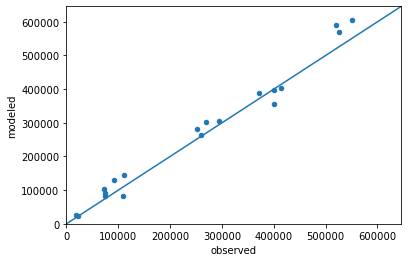

In [25]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,county,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,,
King County Metro,NaN,"391,187","381,593","-9,594",-2.45%
Sound Transit,NaN,"145,426","142,976","-2,449",-1.68%
Community Transit,NaN,"30,918","26,641","-4,277",-13.83%
Pierce Transit,Pierce,"27,233","33,580","6,347",23.30%
Washington Ferries,NaN,"16,912","12,687","-4,225",-24.98%
Kitsap Transit,NaN,"8,624","11,452","2,829",32.80%
Everett Transit,NaN,"3,290","1,698","-1,593",-48.41%
TOTAL,NaN,"623,590","610,627","-12,963",-35.25%


----
### Key Routes
#### Ferries

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,NaN,"1,356",629,-727,-53.64%
1,POF Seattle - Vashon,NaN,670,463,-207,-30.89%
2,WSF Kingston - Edmon,NaN,"1,732",494,"-1,238",-71.49%
3,WSF Bainbridge Islan,NaN,"8,857","9,178",321,3.63%
4,WSF Bremerton - Seat,NaN,"4,484","1,322","-3,162",-70.52%
5,WSF Fauntleroy - Sou,NaN,365,29,-336,-91.93%
6,WSF Vashon Island -,NaN,946,"1,094",148,15.63%
7,WSF Southworth - Vas,NaN,239,291,52,21.90%
8,WSF Point Defiance -,NaN,289,279,-10,-3.34%
9,TOTAL,0,"18,937","13,778","-5,159",-280.65%


r^2 : 0.9709263745721326


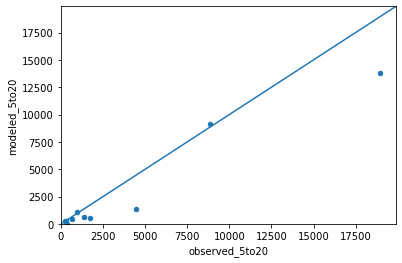

In [28]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,956
4,4202,POF Bremerton - Anna,839
3,4201,POF Bremerton - Pt O,770
1,1975,POF Vashon Island -,727
2,4200,POF Seattle - Bremer,640
7,5003,WSF Bremerton - Seat,550
8,5005,WSF Vashon Island -,352
9,5006,WSF Southworth - Vas,320
10,5007,WSF Point Defiance -,318
6,5002,WSF Bainbridge Islan,275


#### Rail

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,NaN,"69,383","64,630","-4,753",-6.85%
1,Sounder South,NaN,"15,356","15,915",559,3.64%
2,Sounder North,NaN,"1,667","2,083",416,24.98%


r^2 : 0.9998052080006327


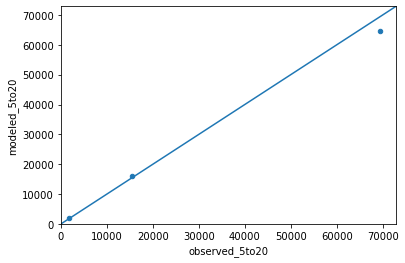

In [31]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [32]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,NaN,"15,336","14,913",-423,-2.76%
4,C Line RapidRide,NaN,"11,368","12,946","1,578",13.88%
1,KC Metro 40,NaN,"11,405","12,145",740,6.49%
0,KC Metro 7,NaN,"10,150","10,621",471,4.64%
10,Sound Transit 550,NaN,"9,168","10,596","1,429",15.58%
5,D Line RapidRide,NaN,"13,078","9,643","-3,435",-26.27%
2,A Line RapidRide,NaN,"8,522","7,175","-1,347",-15.80%
7,F Line RapidRide,NaN,"5,267","6,151",884,16.78%
3,B Line RapidRide,NaN,"5,914","5,776",-138,-2.33%
8,SLU Streetcar,NaN,"1,703","1,399",-304,-17.85%


r^2 : 0.9356067200024092


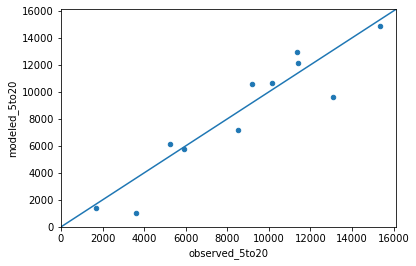

In [33]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8852094340728073


r^2 Everett Transit: -0.36777548909400626
r^2 King County Metro: 0.9303694556177707
r^2 Kitsap Transit: 0.7486920838027837
r^2 Pierce Transit: 0.8714567413672288
r^2 Sound Transit: 0.9956632453463693


r^2 Washington Ferries: 0.927272081414943


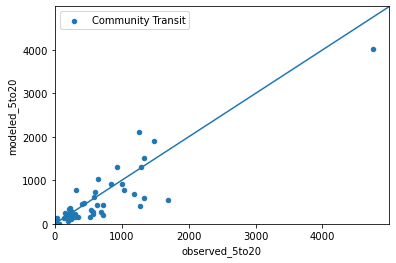

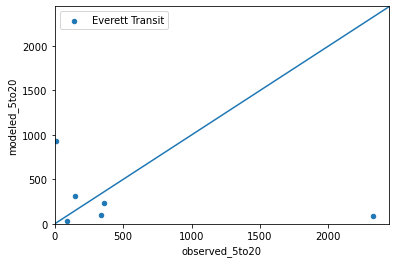

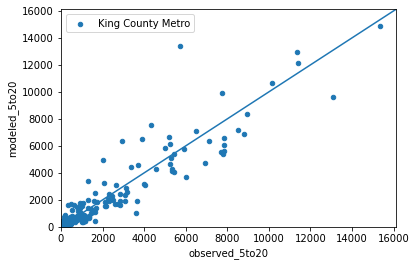

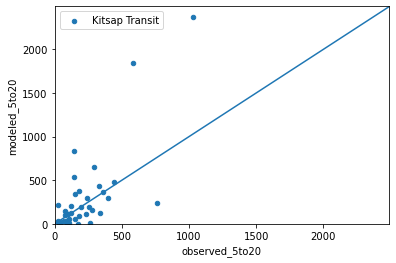

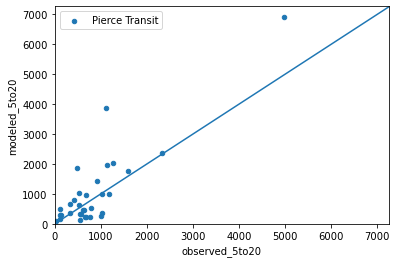

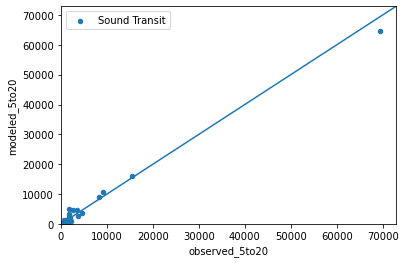

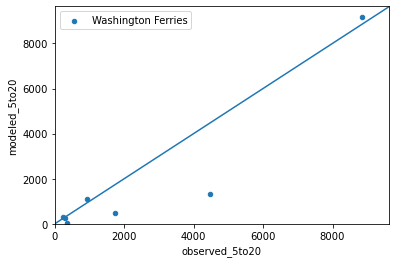

In [34]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,"9,416","9,286",-130,-1.38%
Westlake,NaN,"10,904","6,699","-4,205",-38.57%
University St,NaN,"5,257","6,123",866,16.47%
Pioneer Square,NaN,"3,865","5,415","1,550",40.11%
Int'l District,NaN,"5,647","2,698","-2,950",-52.24%
Capitol Hill,NaN,"7,016","7,163",147,2.09%
Stadium,NaN,"1,912",901,"-1,011",-52.86%
SODO,NaN,"2,108","3,136","1,029",48.81%
Beacon Hill,Pierce,"2,587","2,268",-319,-12.33%


Sound Transit Station Groupings

In [36]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","9,286",-130,-1.38%
Capitol Hill,"7,016","7,163",147,2.09%
Westlake/University St,"16,161","12,822","-3,339",-20.66%
Pioneer Square/Int'l District,"9,512","8,113","-1,400",-14.71%
Stadium/SODO,"4,020","4,038",18,0.44%
Beacon Hill/Mount Baker,"4,809","4,729",-80,-1.67%
Columbia City,"2,376","2,468",92,3.86%
Othello/Rainier Beach,"4,412","5,075",663,15.03%
Tukwila Int'l Blvd,"2,779","3,134",355,12.78%


# Stop Transfers

### Light Rail

In [37]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,0.39,-99.00,99.39,-100.39%
Westlake,NaN,0.27,0.36,-0.10,-26.60%
University St,NaN,0.51,0.20,0.31,153.96%
Pioneer Square,NaN,0.43,0.16,0.27,172.49%
Int'l District,NaN,0.58,0.45,0.13,29.94%
Capitol Hill,NaN,0.06,-99.00,99.06,-100.06%
Stadium,NaN,0.29,0.12,0.17,145.61%
SODO,NaN,0.42,0.31,0.11,34.01%
Beacon Hill,Pierce,0.34,0.35,-0.01,-4.22%


# Externals

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","120,024","-9,976",-7.67%
I-5 to Mount Vernon,3744,Snohomish,"67,000","44,324","-22,676",-33.84%
I-90 @ Snoqualmie Pass,3739,King,"33,000","21,695","-11,305",-34.26%
SR-532 to Camano Island,3746,Snohomish,"23,000","10,267","-12,733",-55.36%
SR-507 to Yelm,3734,Pierce,"23,000","14,241","-8,759",-38.08%
SR-3 to Belfair,3749,Kitsap,"18,000","12,359","-5,641",-31.34%
Hood Canal Bridge,3748,Kitsap,"18,000","10,951","-7,049",-39.16%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","4,041","-5,059",-55.59%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","4,840","-1,460",-23.17%


#### Externals - Pierce County

In [39]:
df1 = df[df['county'] == 'Pierce']
pd.options.display.float_format = '{:0,.0f}'.format
df1 = df1.drop('diff', axis=1)
df1['diff'] = df1['modeled']-df1['observed']
df1 = df1.fillna(0)
df1.loc['Total',['observed','modeled','diff']] = df1[['observed','modeled','diff']].sum()
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)

#df1[['external_station']] = df1[['external_station']].applymap('{:0.0f}'.format)
df1.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","120,024",-7.67%,"-9,976"
SR-507 to Yelm,3734,Pierce,"23,000","14,241",-38.08%,"-8,759"
SR-302 to Shelton,3750,Pierce,"4,100","2,687",-34.46%,"-1,413"
SR-7 to Morton,3735,Pierce,"2,700","1,391",-48.49%,"-1,309"
SR-706 to Longmire,3736,Pierce,"1,800","1,500",-16.69%,-300
SR-123 S/O Cayuse Pass,3737,Pierce,"1,100",0,-100.00%,"-1,100"
SR 410 E/O Cayuse Pass,3738,Pierce,960,409,-57.42%,-551
Total,NaN,NaN,"163,660","140,251",-14.30%,"-23,409"


#### Externals - Other Counties

In [40]:
df2 = df[df['county'].isin(['Snohomish', 'Kitsap', 'King'])]
pd.options.display.float_format = '{:0,.0f}'.format
df2 = df2.drop('diff', axis=1)
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.fillna(0)
df2.loc['Total',['observed','modeled','diff']] = df2[['observed','modeled','diff']].sum()
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)

#df2[['external_station']] = df2[['external_station']].applymap('{:0.0f}'.format)
df2.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Mount Vernon,3744,Snohomish,"67,000","44,324",-33.84%,"-22,676"
I-90 @ Snoqualmie Pass,3739,King,"33,000","21,695",-34.26%,"-11,305"
SR-532 to Camano Island,3746,Snohomish,"23,000","10,267",-55.36%,"-12,733"
SR-3 to Belfair,3749,Kitsap,"18,000","12,359",-31.34%,"-5,641"
Hood Canal Bridge,3748,Kitsap,"18,000","10,951",-39.16%,"-7,049"
SR-530 N/O Stanwood,3745,Snohomish,"9,100","4,041",-55.59%,"-5,059"
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","4,840",-23.17%,"-1,460"
SR-2 @ Stevens Pass,3740,King,"5,600","2,277",-59.35%,"-3,323"
SR-530 N/O Darrington,3742,Snohomish,"1,600",924,-42.26%,-676


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

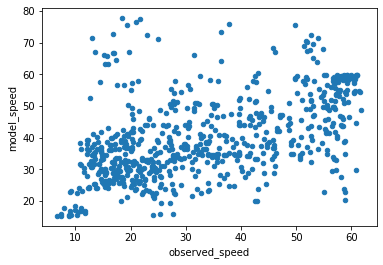

In [41]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

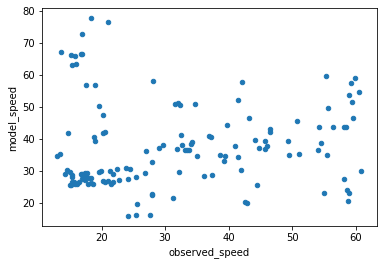

In [42]:
df.loc[df.county=='Pierce'].plot(kind='scatter', y='model_speed', x='observed_speed')

## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

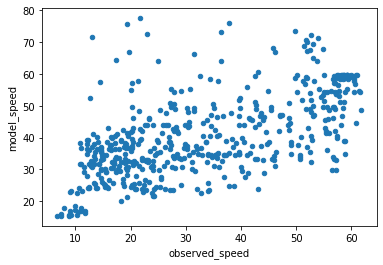

In [43]:
_df = df.loc[df.county!='Pierce']
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
_df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

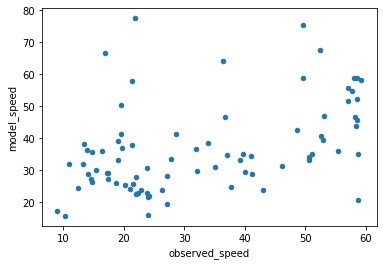

In [44]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [45]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
12,Seattle to Everett - NB,46,58
13,Seattle to Everett - NB,52,58
30,Everett to Seattle - SB,19,27
31,Everett to Seattle - SB,28,27
48,Tacoma to Seattle - NB,22,24
49,Tacoma to Seattle - NB,16,24
66,Seattle to Tacoma - SB,35,59
67,Seattle to Tacoma - SB,20,59
84,Bellevue to Lynnwood - NB,56,57
85,Bellevue to Lynnwood - NB,52,57


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

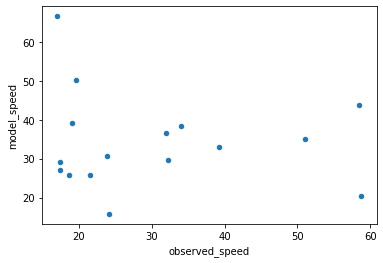

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [47]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
49,Tacoma to Seattle - NB,16,24
67,Seattle to Tacoma - SB,20,59
400,"SR 161, SR 18 to 264th St - SB",39,19
547,"SR 512, SR 167 to I-5 - WB",33,39
556,"SR 512, I-5 to SR 167 - EB",30,32
565,"SR 16, I-5 to Purdy Dr - WB",44,58
574,"SR 16, Purdy Dr to I-5 - EB",35,51
583,"56th Street/Cirque, Alaska to Bridgeport - WB",67,17
592,"19th Street, Bridgeport to Jefferson - EB",26,19
601,"74th/72nd/Pioneer, Meridian to Lakewood - WB",27,17


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

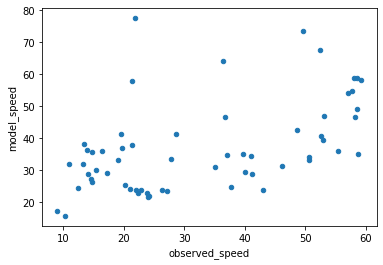

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [49]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,49,58
15,Everett to Seattle - SB,24,27
24,Tacoma to Seattle - NB,22,24
33,Seattle to Tacoma - SB,35,59
42,Bellevue to Lynnwood - NB,54,57
51,Lynnwood to Bellevue - SB,24,22
60,Tukwila to Bellevue - NB,25,20
69,Bellevue to Tukwila - SB,24,43
78,Auburn to Renton - NB,23,22
87,Renton to Auburn - SB,36,56


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

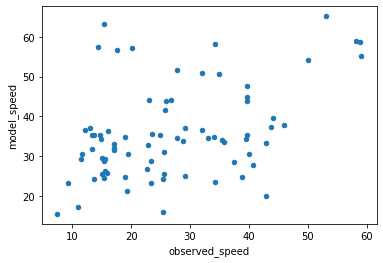

In [50]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [51]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,23,23
3,Seattle to Everett - NB,29,23
20,Everett to Seattle - SB,35,28
21,Everett to Seattle - SB,52,28
38,Tacoma to Seattle - NB,33,43
39,Tacoma to Seattle - NB,20,43
56,Seattle to Tacoma - SB,24,25
57,Seattle to Tacoma - SB,16,25
74,Bellevue to Lynnwood - NB,26,26
75,Bellevue to Lynnwood - NB,31,26


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

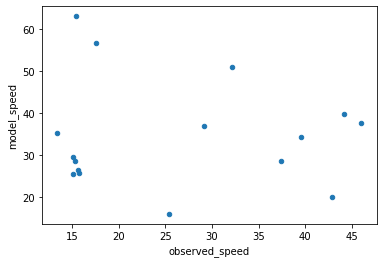

In [52]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [53]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
39,Tacoma to Seattle - NB,20,43
57,Seattle to Tacoma - SB,16,25
390,"SR 161, SR 18 to 264th St - SB",35,13
542,"SR 512, SR 167 to I-5 - WB",29,37
551,"SR 512, I-5 to SR 167 - EB",34,40
560,"SR 16, I-5 to Purdy Dr - WB",38,46
569,"SR 16, Purdy Dr to I-5 - EB",40,44
578,"56th Street/Cirque, Alaska to Bridgeport - WB",63,15
587,"19th Street, Bridgeport to Jefferson - EB",26,16
596,"74th/72nd/Pioneer, Meridian to Lakewood - WB",26,16


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

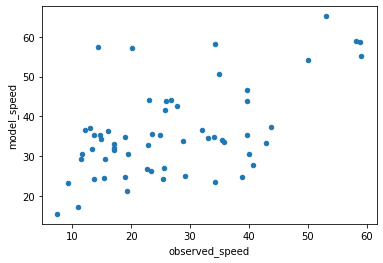

In [54]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [55]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,26,23
10,Everett to Seattle - SB,43,28
19,Tacoma to Seattle - NB,33,43
28,Seattle to Tacoma - SB,24,25
37,Bellevue to Lynnwood - NB,27,26
46,Lynnwood to Bellevue - SB,47,40
55,Tukwila to Bellevue - NB,25,29
64,Bellevue to Tukwila - SB,25,19
73,Auburn to Renton - NB,37,44
82,Renton to Auburn - SB,24,34
